In [25]:
#CSC/ECE/DA 427/527
#Fall 2020

from random import random
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import mean_squared_error

## Preprocessing data

In [26]:
def moon(num_points,distance,radius,width):

 points = num_points

 x1 = [0 for _ in range(points)]
 y1 = [0 for _ in range(points)]
 x2 = [0 for _ in range(points)]
 y2 = [0 for _ in range(points)]

 for i in range(points):
    d = distance
    r = radius
    w = width
    a = random()*math.pi
    x1[i] = math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2) if(random() < 0.5) else (r+w/2)) * math.cos(a))
    y1[i] = math.sqrt(random()) * math.sin(a)*(w) + (r * math.sin(a)) - d
  
    a = random()*math.pi + math.pi
    x2[i] = (r+w/2) + math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2)) if(random() < 0.5) else (r+w/2)) * math.cos(a)
    y2[i] = -(math.sqrt(random()) * math.sin(a)*(-w) + (-r * math.sin(a))) + d
 return ([x1,x2,y1,y2])

In [27]:
def Concatenate(X1,X2,Y1,Y2):
  #Convert list to numpy array and reshape
  X1 = np.asarray(X1)
  Y1 = np.asarray(Y1)
  X1 = X1.reshape(X1.shape[0],1)
  Y1 = Y1.reshape(Y1.shape[0],1)

  #Combine X and Y into one matrix X
  inputs_1 = np.concatenate((X1,Y1),axis = 1)
  #Now input has 2 features, adding feature with value 1 for bias
  X0 = np.ones((inputs_1.shape[0],1))
  inputs_1 = np.concatenate((X0,inputs_1),axis = 1)
  #Label for the first 1000 samples as 1
  label_1 = np.ones((inputs_1.shape[0],1))

  #Do the same with sample in region B
  X2 = np.asarray(X2)
  Y2 = np.asarray(Y2)
  X2 = X2.reshape(X2.shape[0],1)
  Y2 = Y2.reshape(Y2.shape[0],1)

  #Concatenate X and Y into one matrix X
  inputs_2 = np.concatenate((X2,Y2),axis = 1)
  #Adding feature with value 1 for bias
  inputs_2 = np.concatenate((X0,inputs_2),axis = 1)

  #Label for the sencond 1000 samples as -1
  label_2 = np.negative(np.ones((inputs_2.shape[0],1)))


  #Concatenate all together
  inputs = np.concatenate((inputs_1,inputs_2), axis=0)
  label = np.concatenate((label_1,label_2), axis=0)
  return inputs, label

In [28]:
def plot(X_train, y_train, model):
    print("MSE score: {}".format(model.MSE(X_train, y_train)))
    # getting the x co-ordinates of the decision boundary
    plot_x = np.array([min(X_train[:,1]) - 2, max(X_train[:,1]) + 2])
    # getting corresponding y co-ordinates of the decision boundary
    plot_y = (-1/model.w[2]) * (model.w[1] * plot_x + model.w[0])
    # Plot decision boundary
    plt.plot(plot_x, plot_y, label = "Decision_Boundary")

    # Plot scatter points of double moon
    plt.scatter(X_train[:999,1], X_train[:999,2], marker='.', linewidths=0.02, color='red')
    plt.scatter(X_train[1000:,1], X_train[1000:,2], marker='.', linewidths=0.02, color='blue')
    plt.axis([-20, 30, -20, 20])
    plt.xlabel('First input')
    plt.ylabel('Second input')

    plt.show()

## Regularized least squares (RLS)

In [29]:
class RLS:
  def __init__(self):
      self.w = None
      return

  def signum(self, X, w):
    sum = np.dot(X,w)
    filter = np.vectorize(lambda t: 1. if t>0 else -1.)
    return filter(sum)

  def fit(self, X, y, lamb=0.01):
    n = X.shape[1]
   
    R_xx = np.dot(X.T, X)
 
    r_dx = np.dot(X.T,y)

    if np.linalg.det(R_xx) == 0:
      print("This matrix is singular, cannot be inversed!")
    else:
      w = np.dot(np.linalg.inv(R_xx + lamb*np.identity(n)),r_dx)
      self.w = w
              
  def predict(self, X):
    return self.signum(X,self.w)
    
  def MSE(self, X, y):
    error = np.absolute(self.predict(X) - y)
    MSE = np.sum(error**2)/X.shape[0]
    return MSE
    
  def MAE(self, X, y):
    error = np.absolute(self.predict(X) - y)
    MAE = np.sum(error**2)/X.shape[0]
    return MAE

## d = 1

MSE score: 0.006


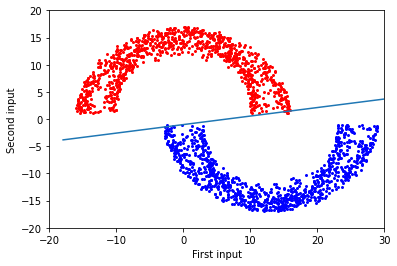

In [30]:
d = -1
X_train, Y_train = Concatenate(*moon(1000,d,10,6))
model = RLS() 
model.fit(X_train, Y_train)
plot(X_train, Y_train, model)

## d = 0

MSE score: 0.072


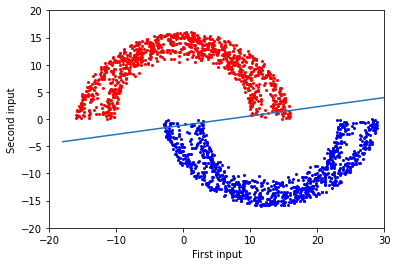

In [31]:
d = 0
X_train_2, Y_train_2 = Concatenate(*moon(1000,d,10,6))
model2 = RLS() 
model2.fit(X_train_2, Y_train_2)
plot(X_train_2, Y_train_2, model2)

## d = -4

MSE score: 0.546


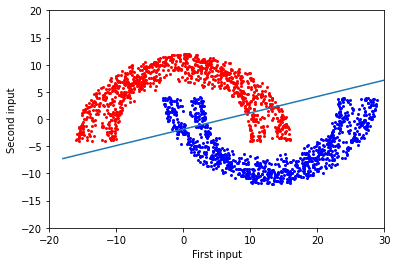

In [32]:
d = 4
X_train_2, Y_train_2 = Concatenate(*moon(1000,d,10,6))
model2 = RLS() 
model2.fit(X_train_2, Y_train_2)
plot(X_train_2, Y_train_2, model2)